# Introduction

This is my first internship task with Code alpha : TITANIC CLASSIFICATION  .  I have chosen to work with the Titanic dataset from kaggle . To built a bobust system which tells whether the person will be save from sinking i'll follow those steps :


1.   Data exploring : Verifie missing and NAN values , visualise the distribution of the target feature "survived" .
2.   Data cleaning
3.   Testing Models : I'll test KNN model and RF model then compare their
  accuracy to choose with witch one i'll work .
4.   Prediction
5.   Interface creation for prediction  








The k-Nearest Neighbors (k-NN) algorithm is a non-parametric, distance-based method. To classify a new, unknown data point, k-NN identifies the k closest training examples to this point. 

Model Details:

Distance: k-NN typically uses Euclidean distance to measure how close points are to each other, although other distance metrics (like Manhattan or Minkowski distance) can also be used.

Choosing k: The value of k is crucial. A small k may make the model too sensitive to noise, while a large k can lead to less precise classifications. Cross-validation is often used to find the optimal k.

Data Normalization: Since distance depends on feature values, it’s essential to normalize or standardize data (bring it to the same scale) to ensure that no feature dominates the distance calculation.

Random Forest is an ensemble model that combines multiple decision trees to make predictions. Each tree is trained on a random sample of the training data and a random subset of features, making each tree slightly different from the others.

The model takes the average of predictions from each tree (for regression) or the majority class of predictions (for classification) to arrive at the final prediction. This ensemble process makes Random Forests more robust and reduces the likelihood of overfitting.

Model Details:

Bootstrap Sampling: Each tree is trained on a random sample of the training data with replacement, meaning each tree sees a slightly different dataset.

Feature Subsampling: At each node of the tree, Random Forest selects a random subset of features to consider, which increases tree diversity and reduces their correlation.

Important Parameters:

Number of Trees (n_estimators): More trees increase stability but also computation time.
Max Features (max_features): Controls the number of random features considered for splitting at each node. An optimal choice can improve accuracy and tree diversity.
Max Depth (max_depth): Limiting tree depth can prevent overfitting and reduce computation.

# Data exploring


In [4]:
import pandas as pd

df = pd.read_excel('C:/Users/hp/Desktop/code alpha/task1/titanic.xlsx')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Vérifier les valeurs manquantes dans le DataFrame
missing_values = df.isnull().sum()

# Afficher le nombre de valeurs manquantes pour chaque colonne
print(missing_values)


PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64


Dans la phase de data cleaning on doit supprimer la colonne Cabin et remplir les ages manquants avec l'age moyenne .

In [6]:
# Vérifier les valeurs NaN dans le DataFrame
nan_values = df.isna().sum()

# Afficher le nombre de valeurs NaN pour chaque colonne
nan_values

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [7]:
# Afficher le nombre de valeurs uniques par colonne
unique_values = df.nunique()
print("\nNombre de valeurs uniques par colonne :")
print(unique_values)


Nombre de valeurs uniques par colonne :
PassengerId    1309
Survived          2
Pclass            3
Name           1307
Sex               2
Age              98
SibSp             7
Parch             8
Ticket          929
Fare            281
Cabin           186
Embarked          3
dtype: int64


In [8]:
#voir les modalités de "Survived"
df['Survived'].value_counts()

Survived
0    815
1    494
Name: count, dtype: int64

Ya pas le probléme de données déséquilibrés .

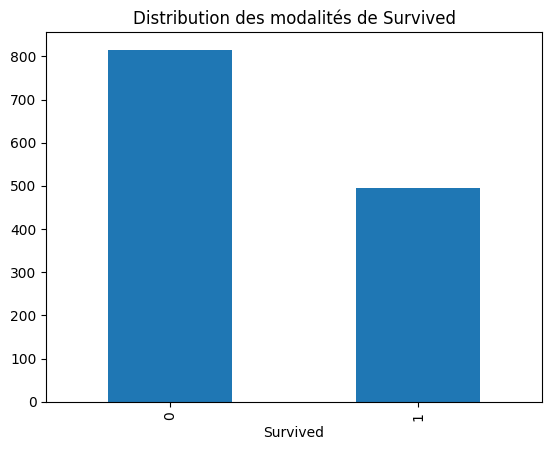

In [9]:
# Importer la librairie matplotlib pour créer des graphiques
import matplotlib.pyplot as plt

# Créer un diagramme en barres pour visualiser la distribution des modalités de "Survived"
df['Survived'].value_counts().plot(kind='bar')

# Ajouter un titre au graphique
plt.title('Distribution des modalités de Survived')

# Afficher le graphique
plt.show()

# Data Cleaning

In [10]:
# Delete feature 'Cabin'
df = df.drop('Cabin', axis=1)
# Delete feature "ticket"
df = df.drop('Ticket', axis=1)

In [11]:
# Replace missing age with average age
mean_age = df['Age'].mean()
df['Age'].fillna(mean_age, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_3696\2211353980.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(mean_age, inplace=True)


In [12]:
# "Embarked" modalities
df['Embarked'].value_counts()

Embarked
S    914
C    270
Q    123
Name: count, dtype: int64

In [13]:
import random
# Replace missing values in Embarked with 'c' or 's' randomly
df['Embarked'].fillna(random.choice(['c', 's','Q']), inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_3696\1201929257.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(random.choice(['c', 's','Q']), inplace=True)


In [14]:
# Convert 'Embarked' to numeric
embarked_mapping = {'S':0,'s': 0, 'C': 1, 'Q': 2}
df['Embarked'] = df['Embarked'].map(embarked_mapping)


In [15]:
# fill missing values in Fare  with a random value  between the min and the mean
mean_fare = df['Fare'].mean()
min_fare = df['Fare'].min()
df['Fare'].fillna(random.uniform(min_fare, mean_fare), inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_3696\1885998655.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Fare'].fillna(random.uniform(min_fare, mean_fare), inplace=True)


In [16]:
# Convert'Sex' to numeric (0 for 'male', 1 for 'female')
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [17]:

missing_values = df.isnull().sum()
print(missing_values)


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


In [18]:

nan_values = df.isna().sum()
nan_values

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [19]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   int64  
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Fare         1309 non-null   float64
 9   Embarked     1309 non-null   int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 102.4+ KB


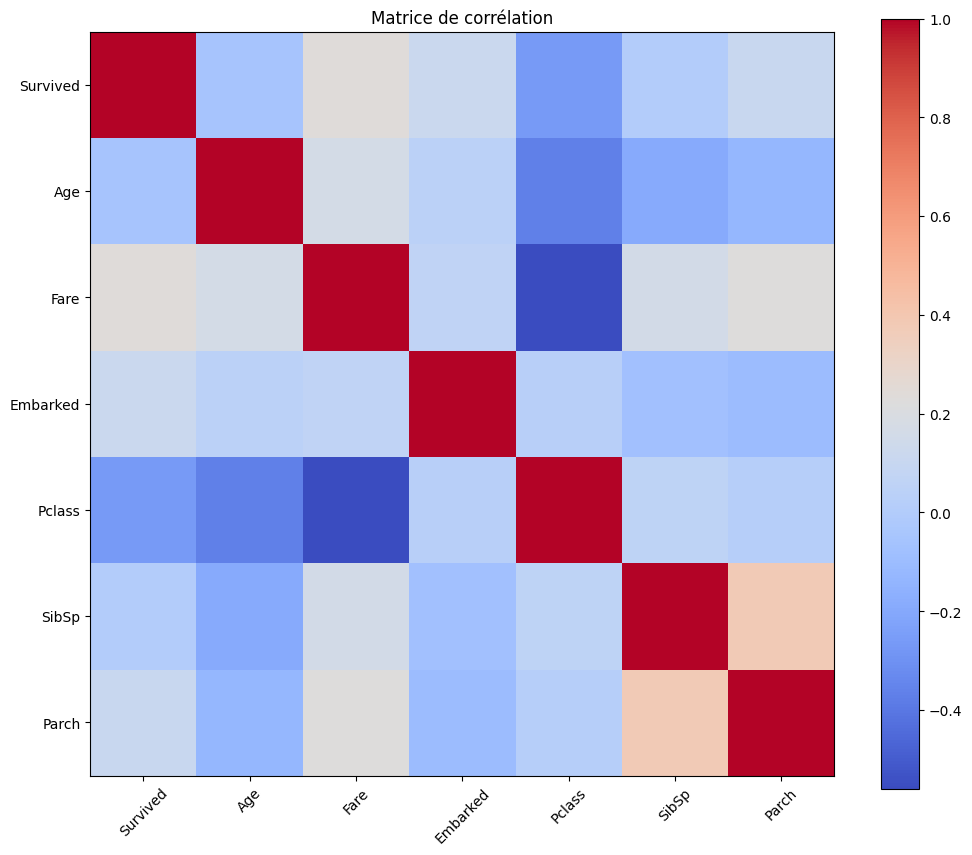

In [21]:
from sklearn.preprocessing import MinMaxScaler

# Sélectionner les colonnes numériques à normaliser
numerical_cols = ['Survived','Age', 'Fare', 'Embarked', 'Pclass', 'SibSp', 'Parch']

# Créer une copie du DataFrame pour la normalisation
df_normalized = df[numerical_cols].copy()



# Initialiser le scaler
scaler = MinMaxScaler()

# Normaliser les colonnes numériques
df_normalized[numerical_cols] = scaler.fit_transform(df_normalized[numerical_cols])

# Matrice de correlation
correlation_matrix = df_normalized.corr()
plt.figure(figsize=(12, 10))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Matrice de corrélation')
plt.show()


No correlation between variables

# Testing Models

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Séparation des features et de la cible
X = df.drop(['Survived','Name'], axis=1)
y = df['Survived']

## KNN model


In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold


# create model KNN
knn_model = KNeighborsClassifier()

# create scaler
scaler = StandardScaler()

n_splits = 5  # Nomber of devisions

# Create the object KFold
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)




# Define parameter
param_grid = {
    'n_neighbors': [5, 6, 7,8,9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
}
# Create the object GridSearchCV
grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=n_splits, scoring='accuracy')


scores = []


for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


    X_train_scaled = scaler.fit_transform(X_train)


    grid_search.fit(X_train_scaled, y_train)


    print(f"Fold {fold + 1}: Meilleurs paramètres: {grid_search.best_params_}")


    y_pred = grid_search.predict(X_test)

    # accuracy
    accuracy = accuracy_score(y_test, y_pred)
    scores.append(accuracy)
    print(f"Fold {fold + 1}: Précision: {accuracy:.4f}")
    print("-" * 30)


Fold 1: Meilleurs paramètres: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
Fold 1: Précision: 0.5076
------------------------------


C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


Fold 2: Meilleurs paramètres: {'metric': 'euclidean', 'n_neighbors': 8, 'weights': 'uniform'}
Fold 2: Précision: 0.5954
------------------------------


C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


Fold 3: Meilleurs paramètres: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Fold 3: Précision: 0.8244
------------------------------


C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


Fold 4: Meilleurs paramètres: {'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'uniform'}
Fold 4: Précision: 0.5878
------------------------------


C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


Fold 5: Meilleurs paramètres: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Fold 5: Précision: 0.4061
------------------------------


C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [24]:
import numpy as np
# Résultats globaux
print("Performance moyenne du modèle:", np.mean(scores))
print("Écart-type des performances:", np.std(scores))


Performance moyenne du modèle: 0.5842794887543505
Écart-type des performances: 0.1381442739236081


The accuracy of the KNN model is not enougth

##  RF model



In [25]:
from sklearn.ensemble import RandomForestClassifier
# Create the model Random Forest
rf_model = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 200, 300],  # Nombre d'arbres
    'max_depth': [ 10, 20, 30],  # Profondeur maximale des arbres
    'min_samples_split': [2, 5, 10],  # Nombre minimum d'échantillons requis pour diviser un nœud
    'min_samples_leaf': [1, 2, 4],    # Nombre minimum d'échantillons dans une feuille
    'max_features': ['sqrt', 'log2'],  # Nombre de caractéristiques à considérer à chaque division
}


grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=n_splits, scoring='accuracy')

#list of scores
rf_scores = []


for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    grid_search_rf.fit(X_train, y_train)


    print(f"Fold {fold + 1} (Random Forest): Meilleurs paramètres: {grid_search_rf.best_params_}")


    y_pred_rf = grid_search_rf.predict(X_test)

    # Calculate the precesion of the model
    accuracy_rf = accuracy_score(y_test, y_pred_rf)
    rf_scores.append(accuracy_rf)
    print(f"Fold {fold + 1} (Random Forest): Précision: {accuracy_rf:.4f}")
    print("-" * 30)


KeyboardInterrupt: 

max accuracy with {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}

In [26]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier


# Créer et entraîner le modèle
rf_model = RandomForestClassifier(max_depth=20, max_features='log2', min_samples_leaf=2, min_samples_split=2, n_estimators=100)
rf_model.fit(X_train, y_train)  # Entraîner le modèle

	#PassengerId	Pclass	Sex	Age	SibSp	Parch	Fare	Embarked
nouveau_passager = pd.DataFrame({
    'PassengerId':[2000],
    'Pclass': [3],
    'Sex': [1],
    'Age': [25],
    'SibSp': [1],
    'Parch': [0],
    'Fare': [7.25],
    'Embarked': [0]

})

# Faire la prédiction
prediction = rf_model.predict(nouveau_passager)
print("Survived" if prediction[0] == 1 else "Did not survive")

Survived


In [27]:
import pandas as pd

# Function to make the prediction
def predict_survival():
    # Prompt the user to enter values for each feature
    try:
        passengerid = int(input("Enter Passenger ID: "))
        pclass = int(input("Enter Pclass (1, 2, or 3): "))
        age = float(input("Enter Age: "))
        fare = float(input("Enter Fare: "))
        sex_input = input("Enter Sex (Male/Female): ").strip().lower()
        sex = 1 if sex_input == 'male' else 0
        embarked = int(input("Enter Embarked (0 = C, 1 = Q, 2 = S): "))
        sibsp = int(input("Enter SibSp: "))
        parch = int(input("Enter Parch: "))

        # Create a DataFrame with the new data
        nouveau_passager = pd.DataFrame({
            'PassengerId': [passengerid],
            'Pclass': [pclass],
            'Sex': [sex],
            'Age': [age],
            'SibSp': [sibsp],
            'Parch': [parch],
            'Fare': [fare],
            'Embarked': [embarked]
        })

        # Make the prediction
        prediction = rf_model.predict(nouveau_passager)

        # Display the result
        print("Prediction: Survived" if prediction[0] == 1 else "Prediction: Did not survive")

    except ValueError as e:
        print("Invalid input, please enter the correct data type for each field.")
        print(e)

# Run the prediction function
predict_survival()


Prediction: Did not survive
